<h3 align=center> In His Name, the Most High </h3>

In [1]:
#importing libraries
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [2]:
#importing train data

train_words = list() # a list of list of words for every sentence in train dataset
train_tags = list() # a list of list of IOB tags for every sentence in train dataset
train_intents = list() # a list of intent for every sentence in train dataset
train_data = list() # a list of dicts contaiting above data in a more structured form
train_vocabs = set() # a set containing whole train dataset words

with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                # what to do if not word.isalpha()??
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
                    
        # handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]

        if (intent != 'atis_cheapest'): #droping 'atis_cheapest' because it has only 1 sample!
          train_words.append(words)
          train_tags.append(tags)
          train_intents.append(intent)
          train_data.append({
              'words': words,
              'iob_tags': tags,
              #             'length': len(words),
              'intent': intent})

print('train dataset vocab size:', len(train_vocabs))
print('# of train dataset rows:', len(train_data))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

train dataset vocab size: 895
# of train dataset rows: 4977
# of train dataset unique intents: 16
# of train dataset unique IOB tags: 121


In [3]:
ind = 0
train_data[ind]

{'intent': 'atis_flight',
 'iob_tags': ['O',
  'O',
  'O',
  'O',
  'O',
  'B-fromloc.city_name',
  'O',
  'B-toloc.city_name',
  'B-round_trip',
  'I-round_trip'],
 'words': ['i',
  'want',
  'to',
  'fly',
  'from',
  'baltimore',
  'to',
  'dallas',
  'round',
  'trip']}

In [4]:
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


In [5]:
train_intents_freq = dict()
for intent in set(train_intents):
    train_intents_freq[intent] = train_intents.count(intent)
    
for key in train_intents_freq:
    value = train_intents_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents) * 100))

atis_flight_time: 54 (1.08%),
atis_airfare: 424 (8.52%),
atis_distance: 20 (0.40%),
atis_flight: 3687 (74.08%),
atis_restriction: 6 (0.12%),
atis_ground_service: 256 (5.14%),
atis_city: 19 (0.38%),
atis_aircraft: 82 (1.65%),
atis_airline: 159 (3.19%),
atis_ground_fare: 18 (0.36%),
atis_flight_no: 12 (0.24%),
atis_capacity: 16 (0.32%),
atis_quantity: 51 (1.02%),
atis_airport: 20 (0.40%),
atis_abbreviation: 147 (2.95%),
atis_meal: 6 (0.12%),


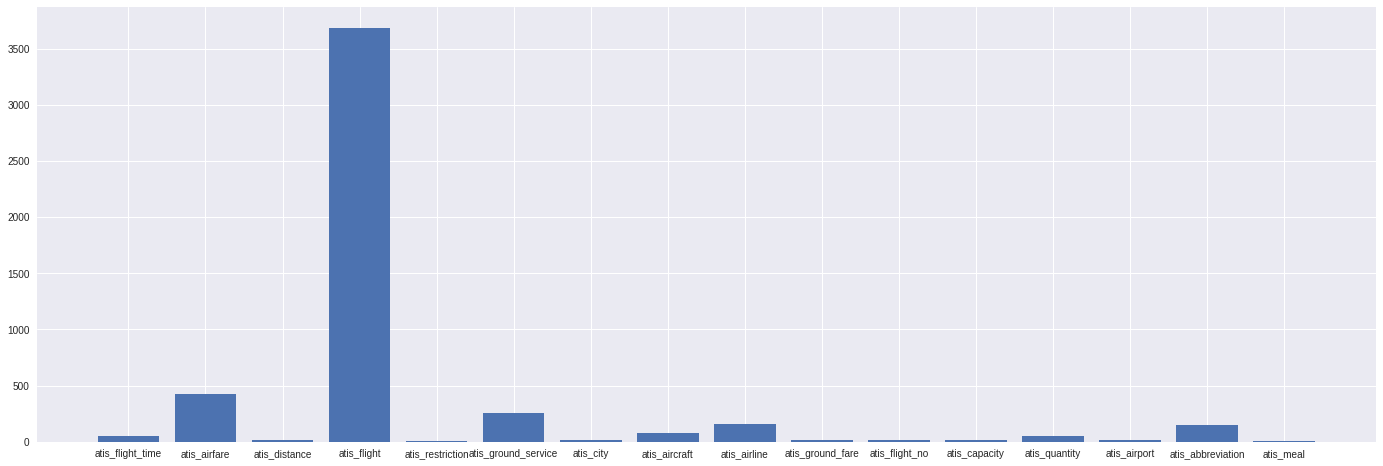

In [6]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [7]:
train_tags_freq = dict()
count = 0
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += 1 #item.count(tag)
        else: train_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in train_tags_freq:
    value = train_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 35662 (63.46%),
B-fromloc.city_name: 4326 (7.70%),
B-toloc.city_name: 4343 (7.73%),
B-round_trip: 348 (0.62%),
I-round_trip: 339 (0.60%),
B-cost_relative: 343 (0.61%),
B-fare_amount: 53 (0.09%),
I-fare_amount: 51 (0.09%),
B-arrive_date.month_name: 47 (0.08%),
B-arrive_date.day_number: 47 (0.08%),
I-fromloc.city_name: 691 (1.23%),
B-stoploc.city_name: 239 (0.43%),
B-arrive_time.time_relative: 187 (0.33%),
B-arrive_time.time: 208 (0.37%),
I-arrive_time.time: 161 (0.29%),
B-toloc.state_code: 86 (0.15%),
I-toloc.city_name: 1099 (1.96%),
I-stoploc.city_name: 47 (0.08%),
B-meal_description: 57 (0.10%),
B-depart_date.month_name: 379 (0.67%),
B-depart_date.day_number: 395 (0.70%),
B-airline_name: 701 (1.25%),
I-airline_name: 421 (0.75%),
B-depart_time.period_of_day: 593 (1.06%),
B-depart_date.day_name: 889 (1.58%),
B-toloc.state_name: 77 (0.14%),
B-depart_time.time_relative: 323 (0.57%),
B-depart_time.time: 369 (0.66%),
B-toloc.airport_name: 39 (0.07%),
I-toloc.airport_name: 49 (0.09%),
B-d

In [8]:
#importing test data

test_words = list()  # a list of list of words for every sentence in test dataset
test_tags = list() # a list of list of IOB tags for every sentence in test dataset
test_intents = list() # a list of intent for every sentence in test dataset
test_vocabs = set() # a list of dicts contaiting above data in a more structured form
test_data = list() # a set containing whole test dataset words

with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        test_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        test_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        test_intents.append(intent)
        
        test_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(test_vocabs))
print('# of test dataset rows:', len(test_data))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

train dataset vocab size: 0
# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [9]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [10]:
test_intents_freq = dict()
for intent in set(test_intents):
    test_intents_freq[intent] = test_intents.count(intent)
    
for key in test_intents_freq:
    value = test_intents_freq[key]
    print('%s: %d (%.2f%%) ,' % (key, value, value / len(test_intents) * 100))

atis_day_name: 2 (0.22%) ,
atis_flight_time: 1 (0.11%) ,
atis_airfare: 49 (5.49%) ,
atis_distance: 10 (1.12%) ,
atis_flight: 645 (72.23%) ,
atis_ground_service: 36 (4.03%) ,
atis_city: 6 (0.67%) ,
atis_aircraft: 9 (1.01%) ,
atis_airport: 18 (2.02%) ,
atis_airline: 38 (4.26%) ,
atis_ground_fare: 7 (0.78%) ,
atis_capacity: 21 (2.35%) ,
atis_quantity: 3 (0.34%) ,
atis_flight_no: 9 (1.01%) ,
atis_abbreviation: 33 (3.70%) ,
atis_meal: 6 (0.67%) ,


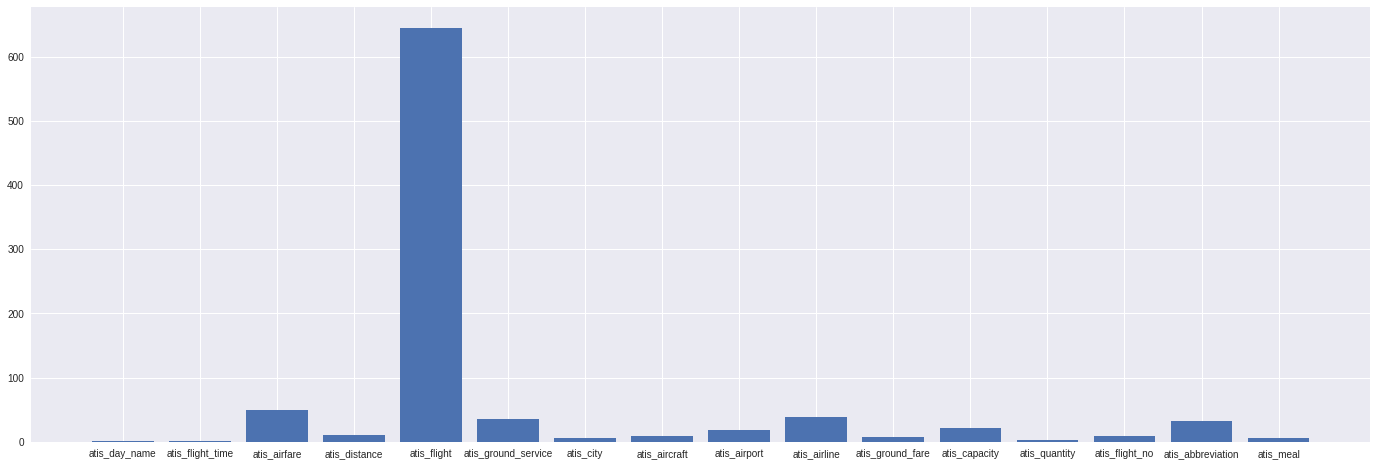

In [11]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [12]:
test_tags_freq = dict()
count = 0
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += 1 #item.count(tag)
        else: test_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in test_tags_freq:
    value = test_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 5501 (60.03%),
B-fromloc.city_name: 704 (7.68%),
B-toloc.city_name: 716 (7.81%),
I-toloc.city_name: 265 (2.89%),
B-stoploc.city_name: 20 (0.22%),
I-stoploc.city_name: 10 (0.11%),
B-depart_date.month_name: 56 (0.61%),
B-depart_date.day_number: 55 (0.60%),
B-depart_time.time_relative: 65 (0.71%),
B-depart_time.time: 57 (0.62%),
I-depart_time.time: 52 (0.57%),
B-round_trip: 73 (0.80%),
I-round_trip: 71 (0.77%),
B-airline_name: 101 (1.10%),
I-airline_name: 65 (0.71%),
B-depart_date.day_name: 212 (2.31%),
B-depart_time.period_of_day: 130 (1.42%),
I-fromloc.city_name: 177 (1.93%),
B-meal_description: 10 (0.11%),
B-depart_date.date_relative: 17 (0.19%),
B-arrive_time.time_relative: 31 (0.34%),
B-arrive_time.time: 34 (0.37%),
I-arrive_time.time: 35 (0.38%),
B-return_date.day_name: 2 (0.02%),
B-arrive_date.date_relative: 2 (0.02%),
B-arrive_date.day_name: 11 (0.12%),
B-flight_stop: 21 (0.23%),
B-depart_date.today_relative: 9 (0.10%),
B-toloc.state_name: 28 (0.31%),
B-arrive_date.month_name: 

##### comparing train & test dataset tags & intents:

In [13]:
print(test_vocabs.difference(train_vocabs))

set()


In [14]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [15]:
set(train_intents).difference(set(test_intents))

{'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [16]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [17]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

to handle imbalanced data first we try to find and remove duplicates:

In [18]:
#removing duplicate train data with 'atis_flight' intent

train_words_dup_free = list()
train_tags_dup_free = list()
train_intents_dup_free = list()
train_data_dup_free = list()
for i in range(len(train_words)):
    words = train_words[i]
    tags = train_tags[i]
    intent = train_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in train_words_dup_free)):
        train_words_dup_free.append(words)
        train_tags_dup_free.append(tags)
        train_intents_dup_free.append(intent)
        train_data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('# of duplicate sentences in train data: %d - %d = %d' % (len(train_words), len(train_words_dup_free), len(train_words) - len(train_words_dup_free)))

# of duplicate sentences in train data: 4977 - 4733 = 244


In [19]:
train_intents_dup_free_freq = dict()
for intent in train_intents_dup_free:
    train_intents_dup_free_freq[intent] = train_intents_dup_free.count(intent)

for key in train_intents_dup_free_freq:
    value = train_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents_dup_free) * 100))

atis_flight: 3443 (72.74%),
atis_airfare: 424 (8.96%),
atis_airline: 159 (3.36%),
atis_ground_service: 256 (5.41%),
atis_quantity: 51 (1.08%),
atis_city: 19 (0.40%),
atis_abbreviation: 147 (3.11%),
atis_aircraft: 82 (1.73%),
atis_distance: 20 (0.42%),
atis_ground_fare: 18 (0.38%),
atis_capacity: 16 (0.34%),
atis_flight_time: 54 (1.14%),
atis_meal: 6 (0.13%),
atis_flight_no: 12 (0.25%),
atis_restriction: 6 (0.13%),
atis_airport: 20 (0.42%),


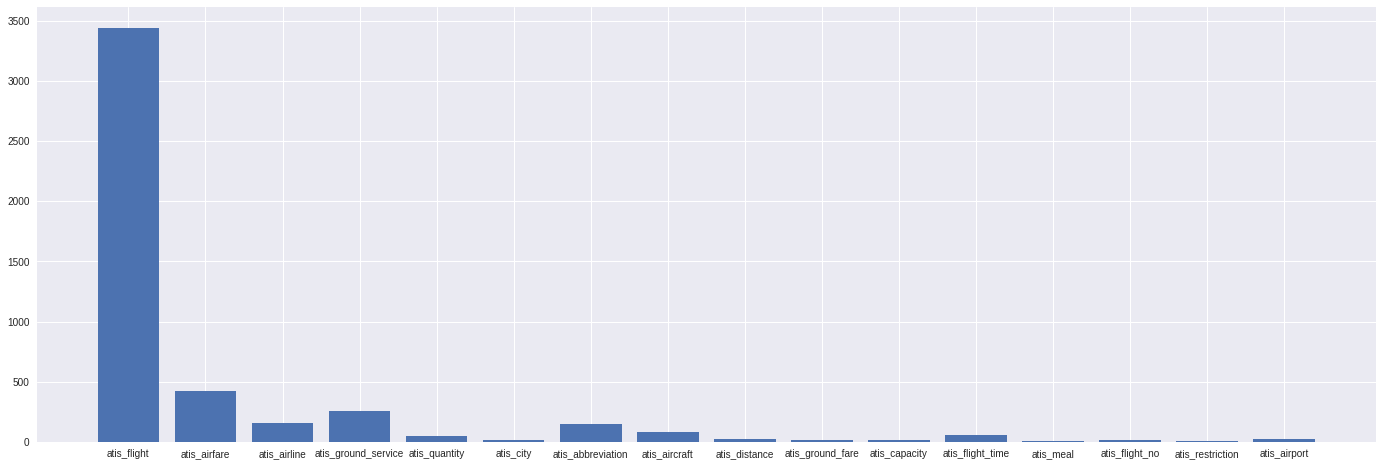

In [20]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_dup_free_freq.keys()),train_intents_dup_free_freq.values())
plt.show()

In [21]:
##removing duplicate test data with 'atis_flight' intent

test_words_dup_free = list()
test_tags_dup_free = list()
test_intents_dup_free = list()
test_data_dup_free = list()
for i in range(len(test_words)):
    words = test_words[i]
    tags = test_tags[i]
    intent = test_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in test_words_dup_free)):
        test_words_dup_free.append(words)
        test_tags_dup_free.append(tags)
        test_intents_dup_free.append(intent)
        test_data.append({
            'words': words,
            'iob_tags': tags,
#             'length': len(words),
            'intent': intent})


print('# of duplicate sentences in test data: %d - %d = %d' % (len(test_words), len(test_words_dup_free),  len(test_words) - len(test_words_dup_free)))

# of duplicate sentences in test data: 893 - 874 = 19


In [22]:
test_intents_dup_free_freq = dict()
for intent in set(test_intents_dup_free):
    test_intents_dup_free_freq[intent] = test_intents_dup_free.count(intent)

for key in test_intents_dup_free_freq:
    value = test_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(test_intents_dup_free) * 100))

atis_day_name: 2 (0.23%),
atis_flight_time: 1 (0.11%),
atis_airfare: 49 (5.61%),
atis_distance: 10 (1.14%),
atis_flight: 626 (71.62%),
atis_ground_service: 36 (4.12%),
atis_city: 6 (0.69%),
atis_aircraft: 9 (1.03%),
atis_airport: 18 (2.06%),
atis_airline: 38 (4.35%),
atis_ground_fare: 7 (0.80%),
atis_capacity: 21 (2.40%),
atis_quantity: 3 (0.34%),
atis_flight_no: 9 (1.03%),
atis_abbreviation: 33 (3.78%),
atis_meal: 6 (0.69%),


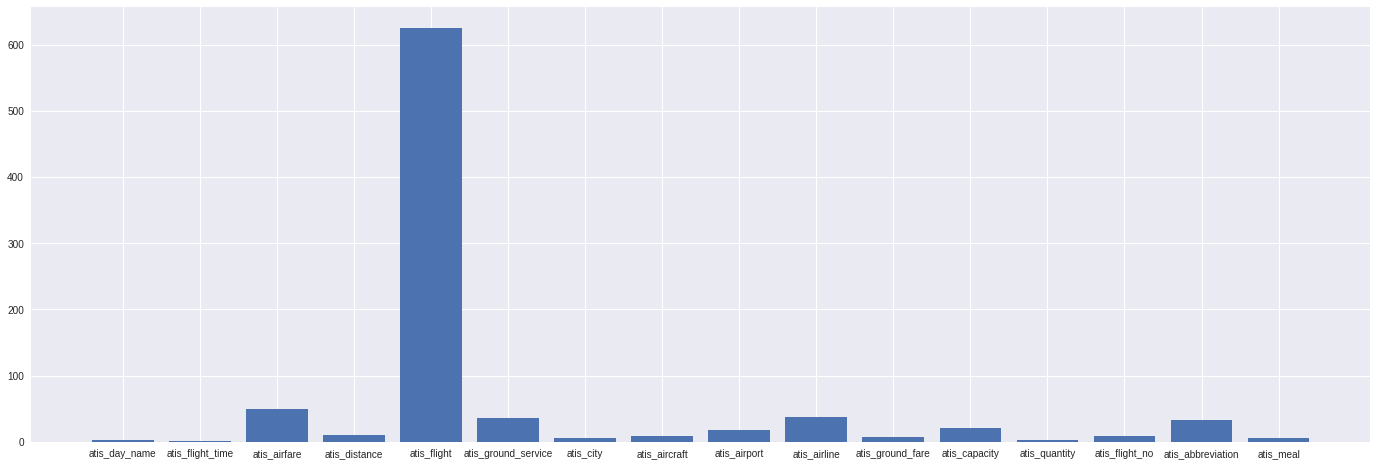

In [23]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_dup_free_freq.keys()),test_intents_dup_free_freq.values())
plt.show()

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

In [25]:
from sklearn.utils import class_weight
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def identity_tokenizer(text):
    return text
# define Tokenizer with Vocab Size
# tokenizer = Tokenizer(num_words=len(train_vocabs))
# tokenizer.fit_on_texts(train_words)
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x_train = vectorizer.fit_transform(train_words)
x_test = vectorizer.fit_transform(test_words)
# x_train = tokenizer.texts_to_matrix(train_words, mode='tfidf')
# x_test = tokenizer.texts_to_matrix(test_words, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_intents)
y_train = encoder.transform(train_intents)
y_test = encoder.transform(test_intents)
print(encoder.classes_)
print(x_train.shape, y_train.shape)
#class_weight.compute_class_weight('balanced',np.unique(train_intents) ,train_intents)

['atis_abbreviation' 'atis_aircraft' 'atis_airfare' 'atis_airline'
 'atis_airport' 'atis_capacity' 'atis_city' 'atis_distance' 'atis_flight'
 'atis_flight_no' 'atis_flight_time' 'atis_ground_fare'
 'atis_ground_service' 'atis_meal' 'atis_quantity' 'atis_restriction']
(4977, 895) (4977, 16)


In [26]:
desired_count = 500
strategy = {0: desired_count, 15: desired_count}# setting atis_restriction and atis_abbreviation classes count just as an example

In [27]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = ADASYN(sampling_strategy=strategy, n_neighbors=5) #SMOTE(sampling_strategy='minority', k_neighbors=5)
X_sm, y_sm = smote.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(5811, 895) (5811, 16)


In [28]:
y_temp = list(encoder.inverse_transform(y_sm))
temp_freq = dict()
for intent in y_temp:
    temp_freq[intent] = y_temp.count(intent)

for key in temp_freq:
    value = temp_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(y_temp) * 100))


atis_flight: 3687 (63.45%),
atis_airfare: 424 (7.30%),
atis_airline: 159 (2.74%),
atis_ground_service: 256 (4.41%),
atis_quantity: 51 (0.88%),
atis_city: 19 (0.33%),
atis_abbreviation: 488 (8.40%),
atis_aircraft: 82 (1.41%),
atis_distance: 20 (0.34%),
atis_ground_fare: 18 (0.31%),
atis_capacity: 16 (0.28%),
atis_flight_time: 54 (0.93%),
atis_meal: 6 (0.10%),
atis_flight_no: 12 (0.21%),
atis_restriction: 499 (8.59%),
atis_airport: 20 (0.34%),


In [29]:
from textblob import TextBlob
from textblob.translate import NotTranslated
import random
sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]

def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        text = TextBlob(message)
        try:
            text = text.translate(to=sr.choice(language))   ## Converting to random langauge for meaningful variation
            print('converted to random lang:',text)
            text = text.translate(to="en")
        except NotTranslated:
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [30]:
data_augmentation('i want to fly from baltimore to dallas round trip', language)

converted to random lang: من می خواهم از بالتیمور به دالاس سفر کنم


['I want to travel from Baltimore to Dallas']

In [31]:
#TO-DO: code cleaning & augmenting data using langauge translation (above function) & word embeddings 
# also data undersampling by removing similar samples from major class (atis_flight)

In [ ]:
# !pip install numpy requests nlpaug transformers

In [33]:
import nlpaug.augmenter.word as naw
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('wordnet')
stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [34]:
# import gensim
# from gensim.models import Word2Vec
# # Create CBOW model
# model1 = gensim.models.Word2Vec(train_words, min_count = 1, 
#                               size = 100, window = 5)
# aug = naw.WordEmbsAug(model_type='word2vec', model=model1) #not working

In [35]:
aug = naw.SynonymAug(aug_p=0.25,stopwords=stop,aug_src='wordnet',aug_max=3)
# aug = naw.ContextualWordEmbsAug(aug_p=0.25,stopwords=stop,aug_max=3)
augmented_data = aug.augment('which airlines fly from boston to washington dc via other cities', n = 5)
augmented_data

['which airlines fly from boston to washington dc via other city',
 'which airlines fly from boston to washington direct current via other cities',
 'which air hose fly from capital of massachusetts to washington dc via other cities',
 'which airlines fly from capital of massachusetts to washington dc via other cities',
 'which airlines fly from boston to washington direct electric current via other cities']